In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
#loading boston house price datasets

from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#Looking the shapr of the data
print(boston.data.shape)

(506, 13)


In [4]:
#Printing the features
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
#looking the describtion and Attribute Information
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [7]:
#converting into pandas and printing the head
import pandas as pd
bos = pd.DataFrame(data=boston.data)
bos.head(5)
 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
bos.shape

(506, 13)

In [10]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
#spliting the data into train and test
from sklearn.model_selection import train_test_split


price=boston.target
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(bos, price, test_size = 0.33, random_state = 5)


print('Train shape', X_train.shape)
print('Test shape', X_test.shape)
print('Train shape', Y_train.shape)
print('Test shape', Y_test.shape)

Train shape (339, 13)
Test shape (167, 13)
Train shape (339,)
Test shape (167,)


In [12]:
# applying column standardization on train and test data
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
X_train=s.fit_transform(np.array(X_train))
X_test=s.transform(np.array(X_test))

In [13]:
# SGD regressor manual training data
man_train=pd.DataFrame(data=X_train)
man_train['price']=Y_train

In [14]:
#converting to numpy array
X_test = np.array(X_test)
Y_test=np.array(Y_test)

# [1] Linear Regression using Scikit Learn's SGD Regressor

In [15]:
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
    plt.figure(figsize=(10,8))
    sns.set_style('whitegrid')
    sns.regplot(Y_test,y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted")
    plt.grid(True)
    plt.show()
    

    sgd_error=mean_squared_error(Y_test,y_pred)
    print('mean sqr error=', sgd_error)
    print('number of iterations =', n_iter)
    print("\n ---Slope--- \n",clf.coef_)
    print("\n---Intercept--- \n",clf.intercept_)
    return clf.coef_, clf.intercept_, sgd_error


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


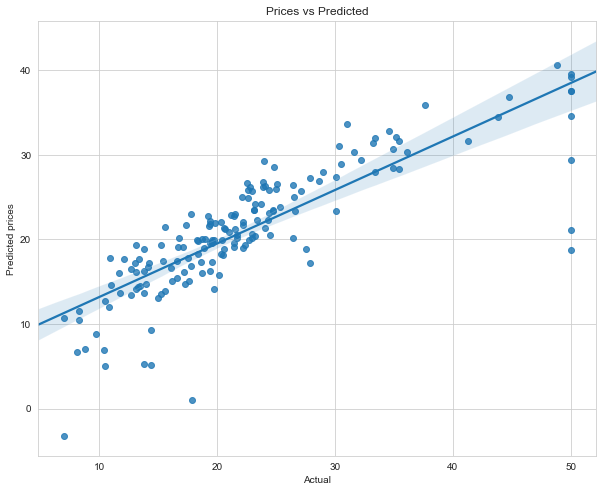

mean sqr error= 31.557058355086674
number of iterations = 1

 ---Slope--- 
 [-0.78491875  0.30335981 -0.36274146  0.17836393 -0.53338592  3.29719428
 -0.2271675  -1.94241771  0.52889753 -0.48295875 -1.83749686  0.56247034
 -2.84998778]

---Intercept--- 
 [21.54474007]


In [16]:
# SGDRegressor, n_iter=1, lr_rate=0.01, lr_rate_variation='constant'
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1)

In [17]:
MSE_skl_1=error_sgd

# [2] Linear Regression using Manual SGD Regressor

In [18]:
# Manual sgd, n_iter=1, lr_rate=0.01, lr_rate_variation='constant'

def manual_fixed(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new


def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(X_test,y_pred):
    plt.figure(figsize=(10,8))
    sns.set_style('whitegrid')
    sns.regplot(Y_test,y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted")
    plt.grid(True)
    plt.show()
      
       
    manual_error=mean_squared_error(Y_test,y_pred)
    print('error=',manual_error)
    
    return manual_error

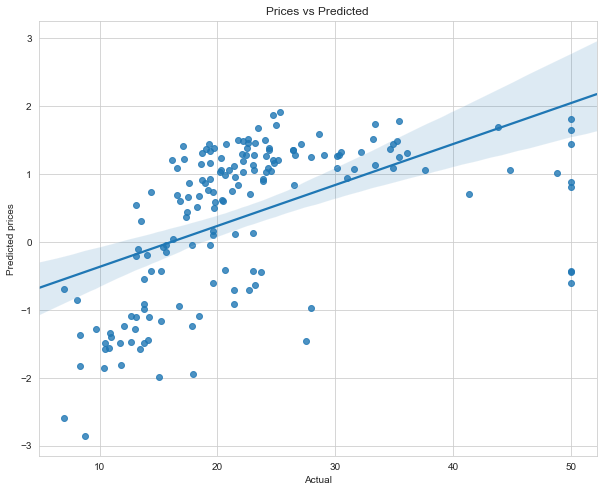

error= 573.583682975236


In [19]:
w, b=manual_fixed(X=man_train, lr_rate_variation='constant' , n_iter=1)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)

In [20]:
MSE_manual_1=manual_error

In [21]:
print('sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('sgd weight---\n',w)

sgd weight---
 [-0.78491875  0.30335981 -0.36274146  0.17836393 -0.53338592  3.29719428
 -0.2271675  -1.94241771  0.52889753 -0.48295875 -1.83749686  0.56247034
 -2.84998778]
*********************************************************************************
sgd weight---
 [[-0.16221574 -0.1522003  -0.11762953  0.03939841 -0.16748392 -0.06336656
  -0.1677686  -0.0187847  -0.23270744 -0.2931616  -0.12109165  0.10522269
  -0.20425752]]


In [22]:
b_diff=[]
w_num=[]

percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('Number of points more than 30% =',cnt)
print('Sgd Intercept=',b_sgd)
print('Manual Intercept=',b)
b_diff.append(abs(b_sgd-b))

Number of points more than 30% = 13
Sgd Intercept= [21.54474007]
Manual Intercept= [0.4698]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


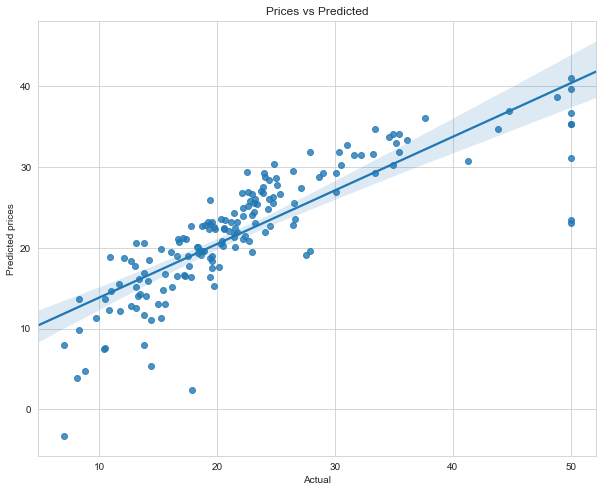

mean sqr error= 29.077178124810295
number of iterations = 100

 ---Slope--- 
 [-1.04243285  0.76979356 -0.06847369  0.10970933 -1.6821843   2.44558355
 -0.57077074 -2.38177343  3.03289927 -2.27258205 -1.66648347  1.05691597
 -3.13483739]

---Intercept--- 
 [22.84406673]


In [23]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=100)

In [24]:
MSE_skl_100= error_sgd

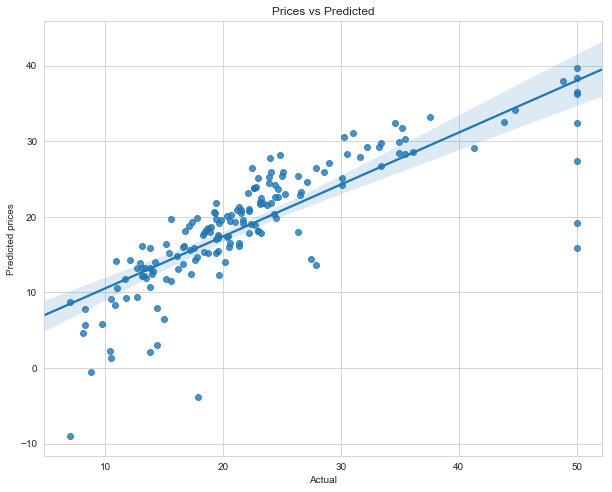

error= 42.35256087525845


In [25]:
w, b = manual_fixed(X=man_train, lr_rate_variation='constant' , n_iter=100)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
 

In [26]:
print('sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('sgd weight---\n',w)

sgd weight---
 [-1.04243285  0.76979356 -0.06847369  0.10970933 -1.6821843   2.44558355
 -0.57077074 -2.38177343  3.03289927 -2.27258205 -1.66648347  1.05691597
 -3.13483739]
*********************************************************************************
sgd weight---
 [[-1.18621926  0.43569393 -0.28419657  0.51399279 -0.40941625  3.14992029
  -0.43755354 -1.38170762  0.21993616 -0.37262852 -1.84838797  0.87918284
  -2.8721713 ]]


In [27]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)

print('Sgd intercept=',b_sgd)
print('Manual Intercept=',b)
b_diff.append(abs(b_sgd-b))

number of points more than 30% in percent= 8
Sgd intercept= [22.84406673]
Manual Intercept= [19.56951612]


In [28]:
MSE_manual_100= manual_error

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


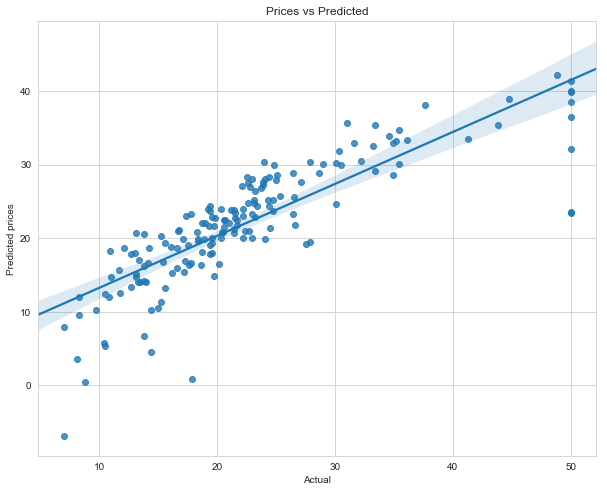

mean sqr error= 28.795285414013655
number of iterations = 1000

 ---Slope--- 
 [-1.66068138  0.56526862 -0.07173634  0.10312531 -1.40684716  2.7504388
 -0.11853409 -2.78981456  3.01698975 -2.33557072 -2.21845073  0.89791288
 -3.40591196]

---Intercept--- 
 [22.77026536]


In [29]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=1000)

In [30]:
MSE_skl_1000= error_sgd

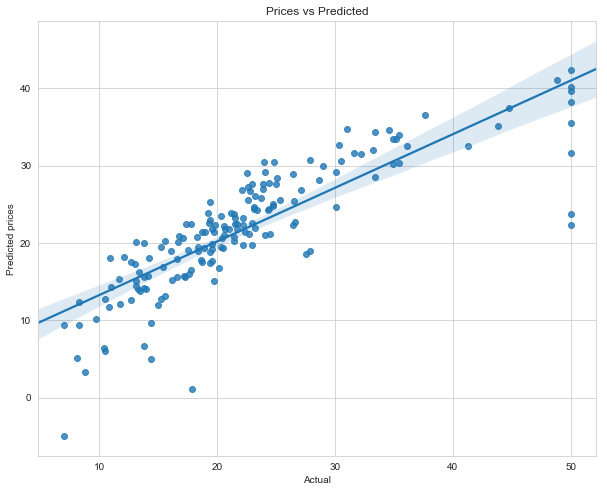

error= 28.140383307032096


In [31]:
w, b=manual_fixed(X=man_train, lr_rate_variation='constant' , n_iter=1000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)

In [32]:
print('sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('sgd weight---\n',w)

sgd weight---
 [-1.66068138  0.56526862 -0.07173634  0.10312531 -1.40684716  2.7504388
 -0.11853409 -2.78981456  3.01698975 -2.33557072 -2.21845073  0.89791288
 -3.40591196]
*********************************************************************************
sgd weight---
 [[-1.20001386  0.78703076 -0.29769606  0.30655154 -1.26645671  2.64744661
  -0.42487022 -2.76304285  1.94264838 -1.37028578 -2.14654559  0.92164352
  -3.27036465]]


In [33]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('number of points more than 30% in percent=',cnt)
print('Sgd intercept=',b_sgd)
print('Manual Intercept=',b)
b_diff.append(abs(b_sgd-b))

number of points more than 30% in percent= 6
Sgd intercept= [22.77026536]
Manual Intercept= [22.5478144]


In [34]:
MSE_manual_1000= manual_error

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


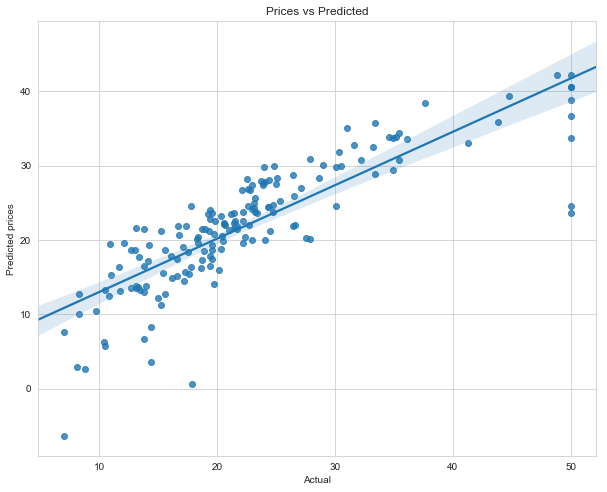

mean sqr error= 27.92357813744099
number of iterations = 10000

 ---Slope--- 
 [-1.39880591  0.75670475 -0.05518746  0.17254912 -1.41015585  3.11826732
 -0.31257037 -2.91576202  3.17424761 -2.01102457 -1.98285003  0.97206098
 -3.49324517]

---Intercept--- 
 [22.67795181]


In [35]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.01, n_iter=10000)


In [36]:
MSE_skl_10000=error_sgd

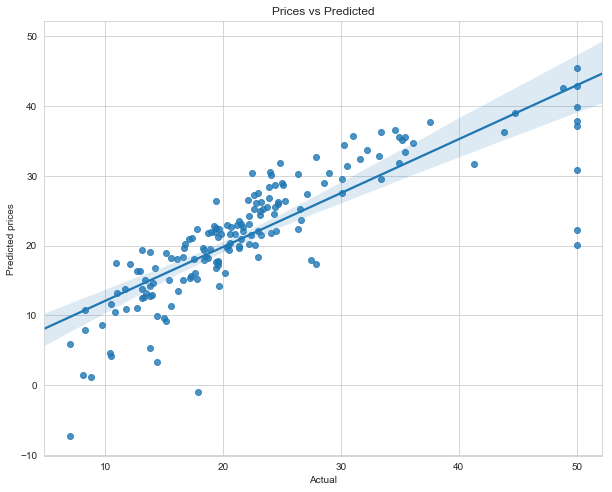

error= 30.54123545960842


In [37]:
w, b=manual_fixed(X=man_train, lr_rate_variation='constant' , n_iter=10000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)

In [38]:
print('sgd weight---\n',w_sgd)
print('*********************************************************************************')
print('Manual sgd weight---\n',w)

sgd weight---
 [-1.39880591  0.75670475 -0.05518746  0.17254912 -1.41015585  3.11826732
 -0.31257037 -2.91576202  3.17424761 -2.01102457 -1.98285003  0.97206098
 -3.49324517]
*********************************************************************************
Manual sgd weight---
 [[-1.26000726  1.06942873 -0.32983346  0.28435064 -1.43323955  3.1627527
  -0.68777811 -2.67094348  2.8056339  -2.42536364 -2.15701675  1.07022223
  -3.03750519]]


In [39]:
percent=abs((w_sgd-w)/w)*100
cnt=0
for i in range(13):
    if (percent[0][i]>30):
        cnt+=1
w_num.append(cnt)
print('Number of points more than 30%',cnt)
print('Sgd intercept=',b_sgd)
print('Manual Intercept=',b)
b_diff.append(abs(b_sgd-b))

Number of points more than 30% 3
Sgd intercept= [22.67795181]
Manual Intercept= [22.46878899]


In [40]:
MSE_manual_10000= manual_error

In [41]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["S.NO","ALGORITHM","ALPHA","LR_RATE_VARIATION","INIT_LR_RATE","POWER_T","N_INTERATIONS","ERROR"]

x.add_row(["1","SKLEARN'S SGD","0.0001","CONSTANT","0.01","0.25","1",MSE_skl_1])
x.add_row(["2","MANUAL SGD","0.0001","CONSTANT","0.01","0.25","1",MSE_manual_1])
x.add_row(["3","SKLEARN'S SGD","0.0001","CONSTANT","0.01","0.25","100",MSE_skl_100])
x.add_row(["4","MANUAL SGD","0.0001","CONSTANT","0.01","0.25","100",MSE_manual_100])
x.add_row(["5","SKLEARN'S SGD","0.0001","CONSTANT","0.01","0.25","1000",MSE_skl_1000])
x.add_row(["6","MANUAL SGD","0.0001","CONSTANT","0.01","0.25","1000",MSE_manual_1000])
x.add_row(["7","SKLEARN'S SGD","0.0001","CONSTANT","0.01","0.25","100000",MSE_skl_10000])
x.add_row(["8","MANUAL SGD","0.0001","CONSTANT","0.01","0.25","100000",MSE_manual_10000])

# Printing the Table
print(x)

y = PrettyTable()

y.field_names = ["S.NO","ALGORITHM","N_ITERATIONS"]

y.add_row(["1","SKLEARN'S SGD","1"])
y.add_row(["2","MANUAL SGD","1"])
y.add_row(["3","SKLEARN'S SGD","100"])
y.add_row(["4","MANUAL SGD","100",])
y.add_row(["5","SKLEARN'S SGD","1000"])
y.add_row(["6","MANUAL SGD","1000"])
y.add_row(["7","SKLEARN'S SGD","100000"])
y.add_row(["8","MANUAL SGD","100000"])

intercepts=[21.84157474, 0.5784, 22.38070844, 19.57099078, 22.3400681, 22.66616673, 22.26977126, 22.60640749]
y.add_column("INTERCEPT VALUE",intercepts)

# Printing the Table
print(y)

+------+---------------+--------+-------------------+--------------+---------+---------------+--------------------+
| S.NO |   ALGORITHM   | ALPHA  | LR_RATE_VARIATION | INIT_LR_RATE | POWER_T | N_INTERATIONS |       ERROR        |
+------+---------------+--------+-------------------+--------------+---------+---------------+--------------------+
|  1   | SKLEARN'S SGD | 0.0001 |      CONSTANT     |     0.01     |   0.25  |       1       | 31.557058355086674 |
|  2   |   MANUAL SGD  | 0.0001 |      CONSTANT     |     0.01     |   0.25  |       1       |  573.583682975236  |
|  3   | SKLEARN'S SGD | 0.0001 |      CONSTANT     |     0.01     |   0.25  |      100      | 29.077178124810295 |
|  4   |   MANUAL SGD  | 0.0001 |      CONSTANT     |     0.01     |   0.25  |      100      | 42.35256087525845  |
|  5   | SKLEARN'S SGD | 0.0001 |      CONSTANT     |     0.01     |   0.25  |      1000     | 28.795285414013655 |
|  6   |   MANUAL SGD  | 0.0001 |      CONSTANT     |     0.01     |   0

 ### Observations:
 
1. The first MSE by the manual sgd is outrageous, but as the iterations kept increasing the error given by it became less.
2. The MSE of SGD is almost the same with all the iterations.
3. At the end of 100000 iterations, Manual SGD gave an MSE lesser than that of SKLearn's SGD.
4. The Sklearn's SGD intercept is almost the same with all the iterations but Manual SGD intercept kept on getting better just like MSE as the iterations kept increasing.
5. The 1000th and 10000th iterations both intercepts are almost similar.